
# Análisis  del *Wine Quality (Red)*




##  Objetivos del cuaderno
1. Cargar el dataset de vinos.
2. Calcular estadísticos básicos (media, mediana, moda) a nivel de columna y de variables clave.
3. Visualizar: barras de medias/medianas, histograma y boxplot (con cuartiles anotados) para alcohol.
4. Calcular y visualizar la matriz de correlación entre variables numéricas.


## 1. Configuración e importaciones

In [67]:

# Esta celda importa las librerías esenciales para el análisis y la visualización.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones visuales opcionales
pd.set_option("display.float_format", lambda x: f"{x:.4f}")
sns.set(style="whitegrid")  # Esta línea ajusta el estilo visual de seaborn.


## 2. Carga de datos

In [68]:

# Esta función es para cargar el dataset desde la URL oficial de UCI.
def cargar_dataset_vinos(url: str) -> pd.DataFrame:

    # pd.read_csv con delimiter=';' porque el archivo usa punto y coma como separador.
    return pd.read_csv(url, delimiter=';')

# URL oficial del dataset (vino tinto)
fuente_uci = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Cargamos el dataset en un DataFrame llamado 'vinos_df'
vinos_df = cargar_dataset_vinos(fuente_uci)

# Vista rápida de las primeras filas
vinos_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5
1,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5
2,7.8000,0.7600,0.0400,2.3000,0.0920,15.0000,54.0000,0.9970,3.2600,0.6500,9.8000,5
3,11.2000,0.2800,0.5600,1.9000,0.0750,17.0000,60.0000,0.9980,3.1600,0.5800,9.8000,6
4,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5


## 3. Exploración rápida

In [69]:

# estructura general del DataFrame.
vinos_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [70]:

#  resumen estadístico básico (describe).
vinos_df.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0000,8.3196,1.7411,4.6000,7.1000,7.9000,9.2000,15.9000
volatile acidity,1599.0000,0.5278,0.1791,0.1200,0.3900,0.5200,0.6400,1.5800
citric acid,1599.0000,0.2710,0.1948,0.0000,0.0900,0.2600,0.4200,1.0000
residual sugar,1599.0000,2.5388,1.4099,0.9000,1.9000,2.2000,2.6000,15.5000
chlorides,1599.0000,0.0875,0.0471,0.0120,0.0700,0.0790,0.0900,0.6110
free sulfur dioxide,1599.0000,15.8749,10.4602,1.0000,7.0000,14.0000,21.0000,72.0000
total sulfur dioxide,1599.0000,46.4678,32.8953,6.0000,22.0000,38.0000,62.0000,289.0000
density,1599.0000,0.9967,0.0019,0.9901,0.9956,0.9968,0.9978,1.0037
pH,1599.0000,3.3111,0.1544,2.7400,3.2100,3.3100,3.4000,4.0100
sulphates,1599.0000,0.6581,0.1695,0.3300,0.5500,0.6200,0.7300,2.0000


## 4. Estadísticos básicos (media, mediana, moda)

In [71]:

# Esta celda calcula la media por columna.
promedios_serie = vinos_df.mean(numeric_only=True)
promedios_serie


fixed acidity           8.3196
volatile acidity        0.5278
citric acid             0.2710
residual sugar          2.5388
chlorides               0.0875
free sulfur dioxide    15.8749
total sulfur dioxide   46.4678
density                 0.9967
pH                      3.3111
sulphates               0.6581
alcohol                10.4230
quality                 5.6360
dtype: float64

In [72]:

# Esta celda calcula la mediana por columna.
medianas_serie = vinos_df.median(numeric_only=True)
medianas_serie


fixed acidity           7.9000
volatile acidity        0.5200
citric acid             0.2600
residual sugar          2.2000
chlorides               0.0790
free sulfur dioxide    14.0000
total sulfur dioxide   38.0000
density                 0.9968
pH                      3.3100
sulphates               0.6200
alcohol                10.2000
quality                 6.0000
dtype: float64

In [88]:

# Esta celda calcula la(s) moda(s) por columna. Tomamos la primera fila en caso de múltiples modas.
modas_df = vinos_df.mode(numeric_only=True).iloc[0]
modas_df


fixed acidity           7.2000
volatile acidity        0.6000
citric acid             0.0000
residual sugar          2.0000
chlorides               0.0800
free sulfur dioxide     6.0000
total sulfur dioxide   28.0000
density                 0.9972
pH                      3.3000
sulphates               0.6000
alcohol                 9.5000
quality                 5.0000
Name: 0, dtype: float64

### 4.1 Foco en `alcohol`

In [74]:

# Esta celda es para calcular la media, mediana y moda puntual de la columna 'alcohol'.
promedio_alcohol = vinos_df['alcohol'].mean()
print(f"Contenido medio de alcohol: {promedio_alcohol:.2f}")

mediana_alcohol = vinos_df['alcohol'].median()
print(f"Contenido mediano de alcohol: {mediana_alcohol:.2f}")

moda_alcohol = vinos_df['alcohol'].mode()[0]
print(f"Contenido modal de alcohol: {moda_alcohol:.2f}")


Contenido medio de alcohol: 10.42
Contenido mediano de alcohol: 10.20
Contenido modal de alcohol: 9.50


## 5. Barras de medias y medianas

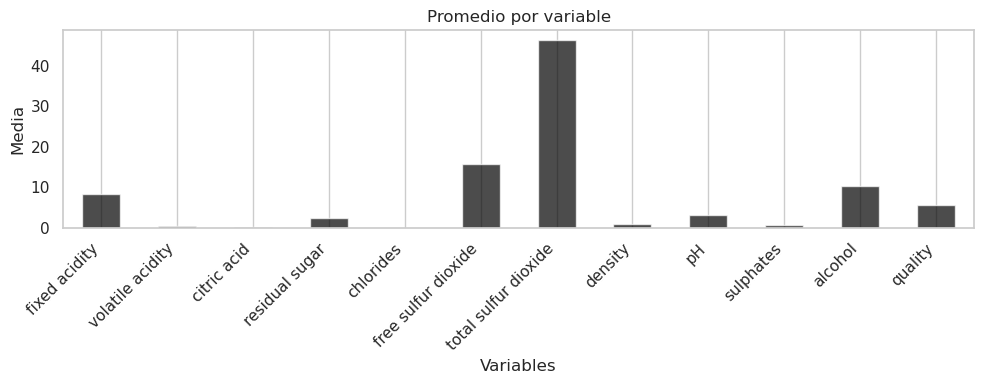

In [75]:

# Esta celda grafica una barra con las medias por columna.
# Usamos matplotlib directamente y evitamos colores específicos para mantener estilo neutro.
plt.figure(figsize=(10, 4))
promedios_serie.plot(kind='bar', color  = 'black', alpha=0.7)
plt.title('Promedio por variable')
plt.ylabel('Media')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


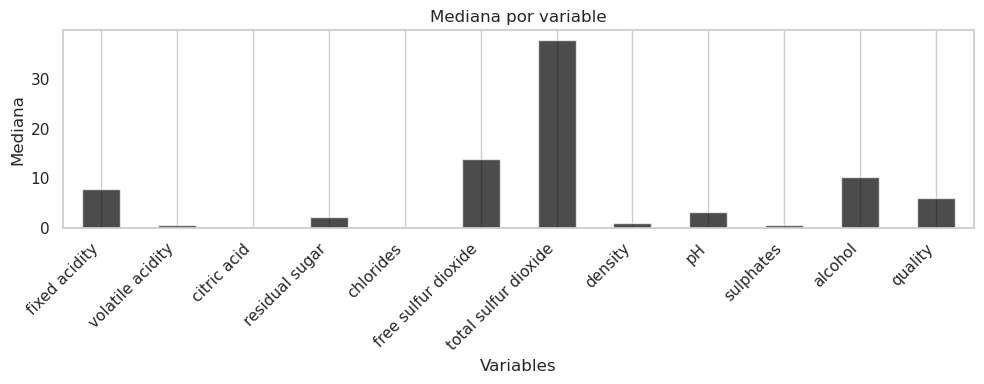

In [76]:

# Esta celda grafica una barra con las medianas por columna.
plt.figure(figsize=(10, 4))
medianas_serie.plot(kind='bar', color = 'black', alpha=0.7)
plt.title('Mediana por variable')
plt.ylabel('Mediana')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


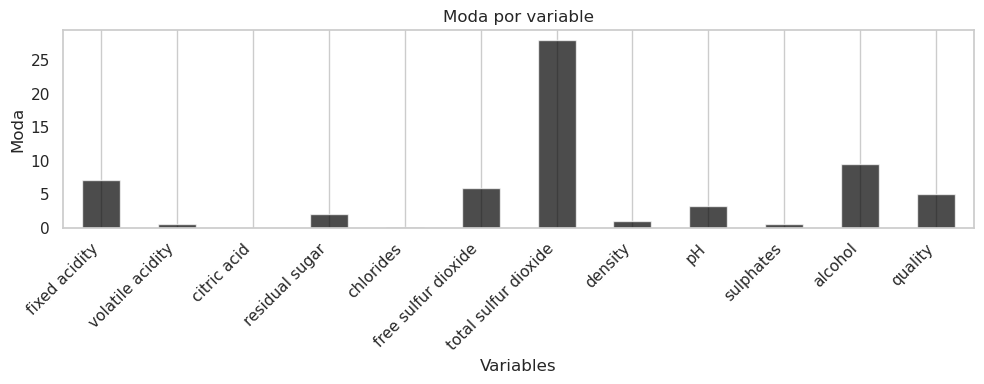

In [77]:
# Esta celda grafica una barra con las modas por columna.
plt.figure(figsize=(10, 4))
modas_df.plot(kind='bar', color = 'black', alpha=0.7)
plt.title('Moda por variable')
plt.ylabel('Moda')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()      

## 6. Distribución y cuartiles de alcohol

In [78]:

# Esta función es para calcular cuartiles y el IQR de una serie numérica.
def calcular_cuartiles_y_iqr(serie: pd.Series):
    Q1 = serie.quantile(0.25)
    Q2 = serie.quantile(0.50)  # Mediana
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q2, Q3, IQR

# Seleccionamos la característica de interés
caracteristica = 'alcohol'
Q1, Q2, Q3, IQR = calcular_cuartiles_y_iqr(vinos_df[caracteristica])

print(f"Q1 (25%): {Q1:.4f}")
print(f"Q2 (50%, mediana): {Q2:.4f}")
print(f"Q3 (75%): {Q3:.4f}")
print(f"IQR (Rango Intercuartílico): {IQR:.4f}")


Q1 (25%): 9.5000
Q2 (50%, mediana): 10.2000
Q3 (75%): 11.1000
IQR (Rango Intercuartílico): 1.6000


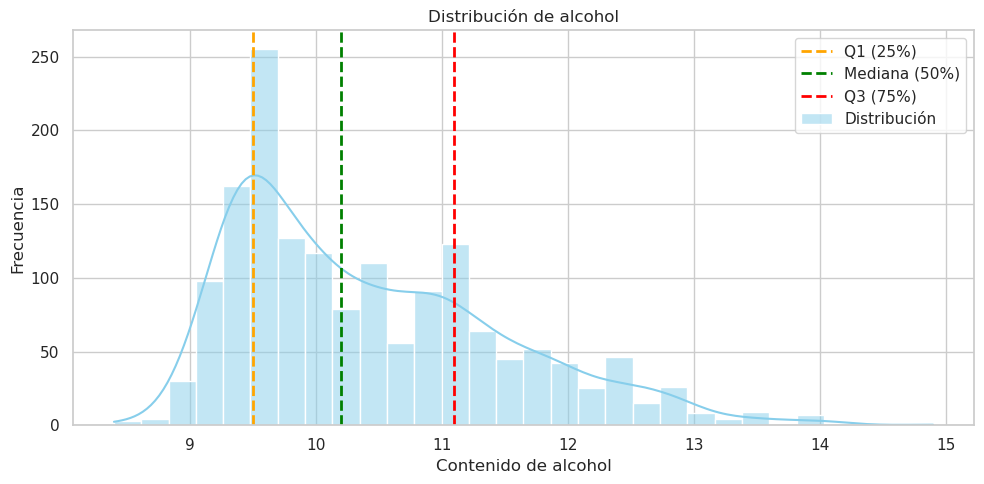

In [84]:
# Esta celda grafica el histograma de la variable 'alcohol' con lineas de cuartiles.
import seaborn as sns
sns.set(style="whitegrid")

feature = 'alcohol'

plt.figure(figsize=(10, 5))

sns.histplot(vinos_df[feature], bins=30, kde=True, color="skyblue", label="Distribución")

# Añadir líneas verticales para Q1, Q2 (mediana) y Q3 previamente calculados
plt.axvline(Q1, color='orange', linestyle='--', linewidth=2, label='Q1 (25%)')
plt.axvline(Q2, color='green', linestyle='--', linewidth=2, label='Mediana (50%)')
plt.axvline(Q3, color='red', linestyle='--', linewidth=2, label='Q3 (75%)')

plt.title(f'Distribución de {feature}')
plt.xlabel(f'Contenido de {feature}')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.legend()
plt.show()


Contenido mínimo de alcohol: 8.40
Contenido máximo de alcohol: 14.90
Contenido medio de alcohol: 10.42
Contenido mediano de alcohol: 10.20


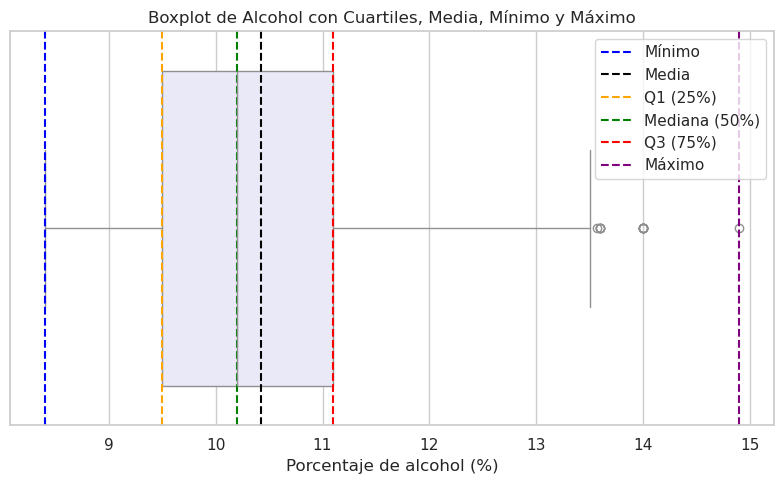

In [85]:
# calcular media y mediana, asi como contenido mininmo y maximo de alcohol 
min_alcohol = vinos_df[caracteristica].min()
max_alcohol = vinos_df[caracteristica].max()
print(f"Contenido mínimo de alcohol: {min_alcohol:.2f}")
print(f"Contenido máximo de alcohol: {max_alcohol:.2f}")
print(f"Contenido medio de alcohol: {promedio_alcohol:.2f}")
print(f"Contenido mediano de alcohol: {Q2:.2f}") 

# representacion de las 4 medidas en un boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=vinos_df[caracteristica], color='lavender')
plt.axvline(min_alcohol, color='blue', linestyle='--', label='Mínimo')
plt.axvline(promedio_alcohol, color='black', linestyle='--', label='Media')
plt.axvline(Q1, color='orange', linestyle='--', label='Q1 (25%)')
plt.axvline(Q2, color='green', linestyle='--', label='Mediana (50%)')
plt.axvline(Q3, color='red', linestyle='--', label='Q3 (75%)')
plt.axvline(max_alcohol, color='purple', linestyle='--', label='Máximo')
plt.title(f'Boxplot de {caracteristica.capitalize()} con Cuartiles, Media, Mínimo y Máximo')
plt.xlabel('Porcentaje de alcohol (%)')
plt.legend()
plt.tight_layout()
plt.show()

## 7.  Matriz de correlación entre variables

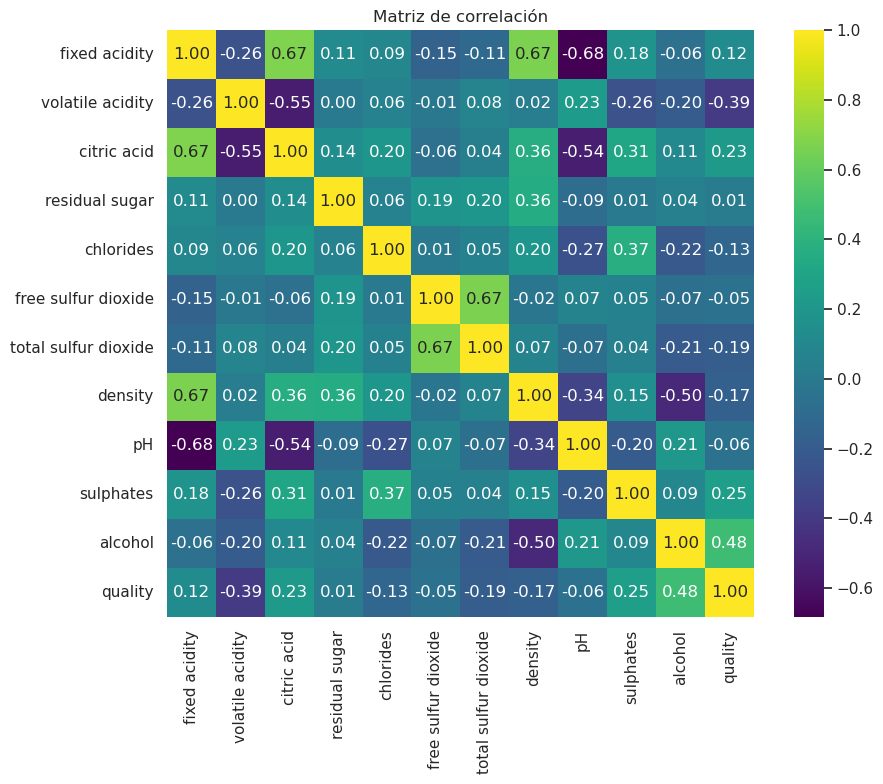

In [86]:

# Esta celda calcula la matriz de correlación de las columnas numéricas.
matriz_correlacion = vinos_df.corr(numeric_only=True)

# Visualización de la matriz de correlación con números anotados (-1 a 1)
plt.figure(figsize=(10, 8))
sns.heatmap(
    matriz_correlacion,      # DataFrame de correlación
    annot=True,              # Mostrar los valores dentro de cada celda
    fmt=".2f",               # Formato: dos decimales
    cmap='viridis',          # Paleta de colores
    square=True,             # Celdas cuadradas
    cbar=True                # Mostrar barra de color
)
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()

